In [1]:
from typing import List, Optional, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

import utils as u
from models import rotationnality
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# abbrs_d = tuple(f"D{i:02}" for i in range(1, 24))
# abbrs_m = tuple(f"M{i:02}" for i in range(1, 8))
# abbrs_p = tuple(f"P{i:02}" for i in range(1, 12))
# abbrs_r = tuple(f"R{i:02}" for i in range(1, 15))
# abbrs_s = tuple(f"S{i:02}" for i in range(1, 32))
# abbrs_t = tuple(f"T{l}" for l in "ABC")
# abbrs = abbrs_d + abbrs_m + abbrs_p + abbrs_r + abbrs_s + abbrs_t

abbrs = ("M01", "M02", "M03", "M04", "M05", "M06", "M07")
abbrs += ("S01", "S02", "S03", "S04", "S05", "S06", "S07", "S08", "S09", "S10", "S21", "S22","S23", "S28", "S29", "S30", "S31")
# abbrs += ("TB",)
abbrs += ("R02", "R03", "R09")
abbrs += ("D01", "D02", "D03", "D04", "D05", "D06", "D09", "D11", "D12", "D13", "D14", "D16", "D18", "D19", "D20", "D21", "D22")
# abbrs = ("S01", "S02", "S03", "S04", "S05", "S06", "S28", "S29", "S30", "S31")
# abbrs = ("S06", "S07", "S08", "S09", "S10", "S28", "S29", "S30", "S31")
# abbrs = (*abbrs, "D05", "D11", "D18", "D19", "D20", "D21", "D22")
# abbrs = ("M01", "M02", "M03", "M04", "M05", "M06", "M07", "D21")
# abbrs = ("D20", "D21", "D22")
# abbrs = ("R02", "R09", "R03", "S01", "S31")
colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

highlighted_abbrs = ("M03", "M04", "M05", "M06")
# highlighted_abbrs = ("S23",)


def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure], highlighted: Optional[List[str]] = None):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in colors.items()]
    if highlighted is not None:
        legend_handles.extend([mpatches.Patch(color="xkcd:bright red", label=lab) for lab in highlighted])
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )


In [3]:
dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    rot_df = rotationnality.rotationnality(abbr)
    dfs[abbr] = rot_df


M01
M02
M03
M04
M05
M06
M07
S01
S02
S03
S04
S05
S06
S07
S08
S09
S10
S21
S22
S23
S28
S29
S30
S31
R02
R03
R09
D01
D02
D03
D04
D05
D06
D09
D11
D12
D13
D14
D16
D18
D19
D20
D21
D22


In [4]:
model_name = rotationnality.__MODEL_NAME__.lower()
figdir = u.get_figdir("summary", subdir=model_name)
model_name = rotationnality.__MODEL_NAME__.title()


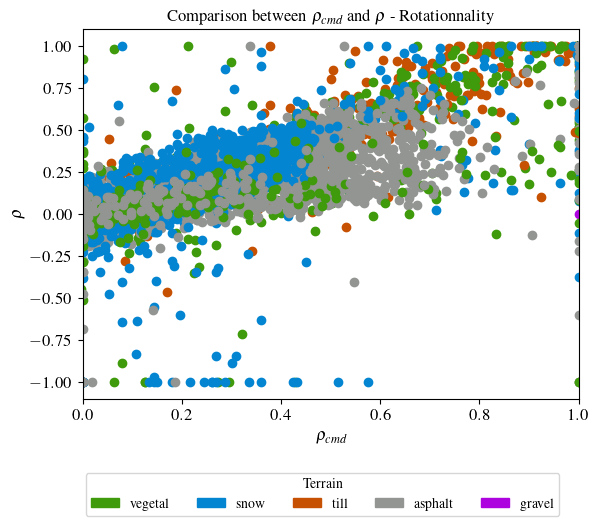

In [5]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    df = dfs[abbr]
    ax.plot(df.rho_cmd, df.rho, col, marker="o", linestyle="", label=abbr)
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel(r"${\rho}_{cmd}$")
ax.set_ylabel("$\\rho$")
ax.set_xlim((0, 1))
ax.set_title(f"Comparison between ${{\\rho}}_{{cmd}}$ and $\\rho$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_rhocmdrho.jpg", bbox_inches="tight")

In [6]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    df = dfs[abbr]
    ax.plot(df.rho_cmd, df.rho, col, marker="o", linestyle="", label=abbr, markersize=1)
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel(r"${\rho}_{cmd}$")
ax.set_ylabel("$\\rho$")
# ax.set_xlim((0, 1))
ax.set_title(f"Comparison between ${{\\rho}}_{{cmd}}$ and $\\rho$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_rhocmdrho.jpg", bbox_inches="tight")

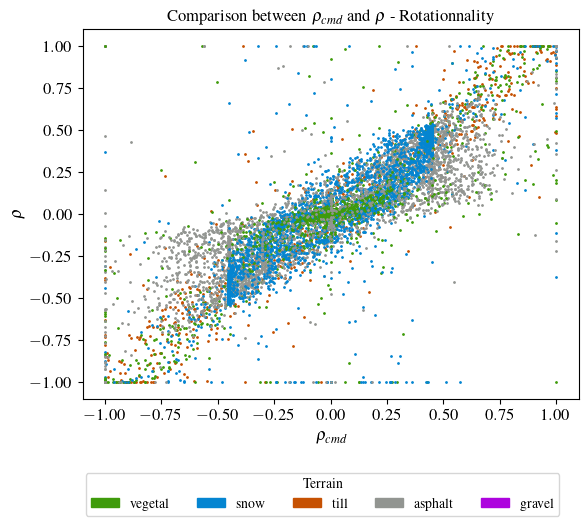

In [7]:
fig, ax = plt.subplots()

abbrsd = ("D01", "D02", "D03", "D04", "D05", "D06", "D09", "D11", "D12", "D13", "D14", "D16", "D18", "D19", "D20", "D21", "D22")
for abbr in abbrsd:
    col = cols[abbr]
    df = dfs[abbr]
    ax.plot(df.rho_cmd, df.rho, col, marker="o", linestyle="", label=abbr, markersize=1)
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel(r"${\rho}_{cmd}$")
ax.set_ylabel("$\\rho$")
# ax.set_ylim((0, 1))
ax.set_title(f"Comparison between ${{\\rho}}_{{cmd}}$ and $\\rho$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrsd)}_{model_name}_D_rhocmdrho.jpg", bbox_inches="tight")

In [8]:
fig, ax = plt.subplots()

abbrsd = ("D01", "D02", "D03", "D04", "D05", "D06", "D09", "D11", "D12", "D13", "D14", "D16", "D18", "D19", "D20", "D21", "D22")
for abbr in abbrsd:
    col = cols[abbr]
    df = dfs[abbr]
    ax.plot(df.time_rel, df.averho, col, marker="o", linestyle="", label=abbr, alpha=0.2)
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Time [s]")
ax.set_ylabel("$\\rho$")
# ax.set_ylim((0, 1))
ax.set_title(f"$\\rho$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrsd)}_{model_name}_D_rho.jpg", bbox_inches="tight")

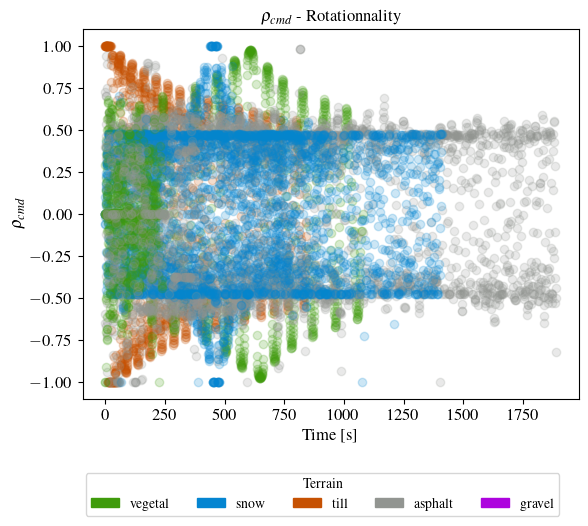

In [9]:
fig, ax = plt.subplots()

abbrsd = ("D01", "D02", "D03", "D04", "D05", "D06", "D09", "D11", "D12", "D13", "D14", "D16", "D18", "D19", "D20", "D21", "D22")
for abbr in abbrsd:
    col = cols[abbr]
    df = dfs[abbr]
    ax.plot(df.time_rel, df.averho_cmd, col, marker="o", linestyle="", label=abbr, alpha=0.2)
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Time [s]")
ax.set_ylabel(r"${\rho}_{cmd}$")
# ax.set_ylim((0, 1))
ax.set_title(f"${{\\rho}}_{{cmd}}$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrsd)}_{model_name}_D_rhocmd.jpg", bbox_inches="tight")

In [10]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    df = dfs[abbr]
    df["avelin"] = 1 - df.averho
    df["avelin_cmd"] = 1 - df.averho_cmd
    ax.plot(dfs[abbr].avelin_cmd, dfs[abbr].avelin, col, marker="o", linestyle="", label=abbr, markersize=1)
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel(r"${\lambda}_{cmd}$")
ax.set_ylabel("$\lambda$")
# ax.set_xlim((0, 1))
ax.set_title(f"Comparison between ${{\lambda}}_{{cmd}}$ and $\lambda$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_lambdacmdambda.jpg", bbox_inches="tight")

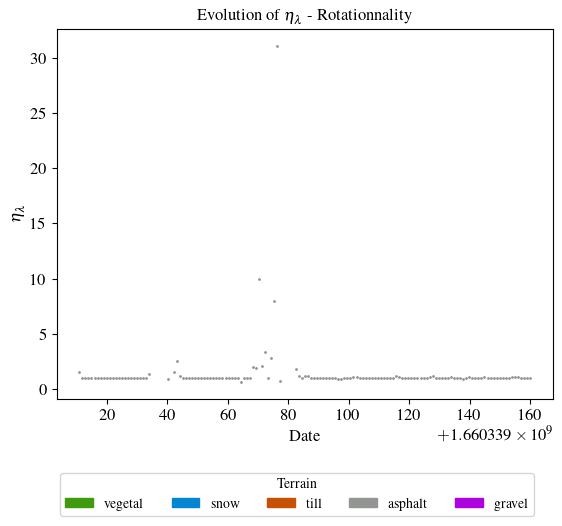

In [11]:
fig, ax = plt.subplots()

for abbr in ("S30",):
    col = cols[abbr]
    df = dfs[abbr]
    df["aveeta_lambda"] = df.avelin / df.avelin_cmd
    df["aveeta_rho"] = df.averho / df.averho_cmd
    df["date"] = pd.to_datetime(df.time, unit="s")
    ax.plot(dfs[abbr].time, dfs[abbr].aveeta_lambda.abs(), col, marker="o", linestyle="", label=abbr, markersize=1)
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
# ax.set_ylim(bottom=0, top=21)
ax.set_xlabel("Date")
ax.set_ylabel(r"${\eta}_{\lambda}$")
ax.set_title(f"Evolution of ${{\eta}}_{{\lambda}}$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_etalambda.jpg", bbox_inches="tight")